<a href="https://colab.research.google.com/github/Alvaroguijarro97/ML_Group_Project/blob/main/Dataframes_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing basic modules
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# import file "foreign_data_by_state_sorted.csv"
from google.colab import files
uploaded = files.upload()

Saving foreign_data_by_state_sorted.csv to foreign_data_by_state_sorted.csv


In [3]:
import io
foreign_data_complete = pd.read_csv(io.BytesIO(uploaded['foreign_data_by_state_sorted.csv']), encoding="windows_1258")

foreign_data_complete = foreign_data_complete.drop([0])

foreign_data_complete = foreign_data_complete.rename(
    columns={
        "Foreign_Population": "Foreign_Population.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [4]:
foreign_data_complete

,Foreign_Population.0,Foreign_Population.1,Foreign_Population.2,Foreign_Population.3,Foreign_Population.4,Foreign_Population.5,Foreign_Population.6,Foreign_Population.7,Foreign_Population.8,Foreign_Population.9,...,Country_Score.21,Country_Score.22,Country_Score.23,Country_Score.24,Country_Score.25,Country_Score.26,Country_Score.27,Country_Score.28,Country_Score.29,Country_Score.30
Baden-Württemberg,0.000008,0.000031,0.000084,0.000093,0.000113,0.000134,0.000153,0.000195,0.000230,0.000233,...,84.0,60.0,48.0,66.0,43.0,68.0,16.0,60.0,59.0,67.0
Bavaria,0.000013,0.000027,0.000086,0.000092,0.000095,0.000165,0.000197,0.000228,0.000267,0.000293,...,60.0,66.0,48.0,43.0,68.0,61.0,67.0,16.0,60.0,59.0
Berlin,0.000037,0.000135,0.000146,0.000269,0.000282,0.000481,0.000494,0.000688,0.000701,0.000797,...,60.0,60.0,68.0,71.0,89.0,84.0,59.0,66.0,67.0,16.0
Brandenburg,0.000004,0.000008,0.000024,0.000034,0.000053,0.000057,0.000059,0.000073,0.000083,0.000087,...,48.0,71.0,61.0,60.0,68.0,43.0,67.0,66.0,59.0,16.0
Bremen,0.000015,0.000045,0.000067,0.000096,0.000156,0.000171,0.000230,0.000245,0.000267,0.000297,...,48.0,60.0,68.0,71.0,67.0,67.0,60.0,59.0,66.0,16.0
Hamburg,0.000011,0.000033,0.000098,0.000148,0.000183,0.000254,0.000290,0.000295,0.000312,0.000353,...,84.0,71.0,68.0,60.0,60.0,67.0,66.0,67.0,59.0,16.0
Hesse,0.000014,0.000036,0.000085,0.000103,0.000109,0.000178,0.000256,0.000324,0.000360,0.000360,...,67.0,48.0,71.0,60.0,68.0,66.0,60.0,67.0,59.0,16.0
Mecklenburg Western Pomerania,0.000005,0.000015,0.000033,0.000066,0.000071,0.000110,0.000115,0.000131,0.000177,0.000185,...,43.0,60.0,71.0,68.0,60.0,67.0,85.0,66.0,59.0,16.0
Lower Saxony,0.000003,0.000009,0.000032,0.000041,0.000047,0.000047,0.000054,0.000073,0.000089,0.000108,...,60.0,85.0,71.0,68.0,43.0,67.0,62.0,66.0,59.0,16.0
Northrhine-Westphalia,0.000010,0.000048,0.000070,0.000071,0.000121,0.000130,0.000141,0.000165,0.000223,0.000246,...,48.0,71.0,60.0,60.0,85.0,66.0,68.0,67.0,59.0,16.0


In [5]:
# import file "migrant_background_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving migrant_background_data_by_state_sorted.csv to migrant_background_data_by_state_sorted.csv


In [6]:
import io
migrant_background_data_complete = pd.read_csv(io.BytesIO(uploaded['migrant_background_data_by_state_sorted.csv']), encoding="windows_1258")

migrant_background_data_complete = migrant_background_data_complete.drop([0])

migrant_background_data_complete = migrant_background_data_complete.rename(
    columns={
        "Population with migrant background": "Population with migrant background.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

migrant_background_data_complete

,Population with migrant background.0,Population with migrant background.1,Population with migrant background.2,Population with migrant background.3,Population with migrant background.4,Population with migrant background.5,Population with migrant background.6,Population with migrant background.7,Population with migrant background.8,Population with migrant background.9,...,Country_Score.3,Country_Score.4,Country_Score.5,Country_Score.6,Country_Score.7,Country_Score.8,Country_Score.9,Country_Score.10,Country_Score.11,Country_Score.12
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,64.0,71.0,84.0,61.0,43.0,68.0,60.0,16.0,67.0,59.0
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,84.0,64.0,68.0,43.0,60.0,67.0,61.0,16.0,59.0,67.0
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,71.0,66.0,61.0,84.0,67.0,16.0,85.0,67.0,64.0,43.0
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,68.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,67.0,61.0,64.0,71.0,68.0,66.0,60.0,59.0,67.0,16.0
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,66.0,61.0,71.0,68.0,67.0,59.0,85.0,16.0,67.0,64.0
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,66.0,60.0,61.0,67.0,71.0,85.0,59.0,68.0,67.0,16.0


In [7]:
# import file "geographical_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving geographical_data_by_state_sorted.csv to geographical_data_by_state_sorted.csv


In [8]:
import io
geography_data_complete = pd.read_csv(io.BytesIO(uploaded['geographical_data_by_state_sorted.csv']), encoding="windows_1258")
geography_data_complete = geography_data_complete.drop([0])

geography_data_complete = geography_data_complete.rename(
    columns={
        "Distance to Country": "Distance to Country.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )



In [9]:
geography_data_complete

,Distance to Country.0,Distance to Country.1,Distance to Country.2,Distance to Country.3,Distance to Country.4,Distance to Country.5,Distance to Country.6,Distance to Country.7,Distance to Country.8,Distance to Country.9,...,Country_Score.21,Country_Score.22,Country_Score.23,Country_Score.24,Country_Score.25,Country_Score.26,Country_Score.27,Country_Score.28,Country_Score.29,Country_Score.30
Baden-Württemberg,211.022395,246.566488,389.337470,398.531119,478.037965,529.198448,599.274692,695.042802,713.136744,721.478692,...,66.0,0.0,81.0,71.0,65.0,68.0,82.0,85.0,67.0,59.0
Bavaria,241.191612,287.937653,344.590755,355.841600,436.024307,512.964009,544.234847,574.082345,576.393931,625.011826,...,0.0,68.0,63.5,65.0,81.0,71.0,82.0,67.0,85.0,59.0
Berlin,344.030995,406.935123,429.169026,565.287452,584.162276,590.624309,640.961172,710.780045,713.266958,729.839414,...,59.0,82.0,66.0,63.5,68.0,0.0,85.0,71.0,67.0,59.0
Brandenburg,342.281251,426.323132,434.405800,555.615433,565.610375,590.126485,616.888677,690.671939,702.568793,732.372807,...,59.0,82.0,63.5,66.0,68.0,0.0,85.0,71.0,67.0,59.0
Bremen,366.823448,395.914292,412.617360,588.823870,631.461613,669.160258,706.797959,724.611439,836.600203,861.461458,...,60.0,82.0,59.0,85.0,66.0,71.0,68.0,0.0,67.0,59.0
Hamburg,296.015090,490.069434,498.300382,563.694789,637.540913,720.574532,731.995725,732.104088,752.569754,826.982831,...,60.0,82.0,59.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Hesse,155.693704,266.090217,337.758312,520.065025,521.751240,608.316560,612.018193,666.173305,691.188638,787.627087,...,81.0,65.0,66.0,71.0,0.0,85.0,82.0,68.0,67.0,59.0
Mecklenburg Western Pomerania,384.441711,404.451985,423.504008,493.786331,601.089962,628.206641,642.814759,682.170860,769.409947,786.478734,...,60.0,59.0,82.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Lower Saxony,281.312897,512.559773,551.252182,563.317456,571.172260,703.831636,708.227266,762.902846,765.457622,813.652452,...,82.0,63.5,59.0,66.0,85.0,68.0,71.0,0.0,67.0,59.0
Northrhine-Westphalia,167.276737,170.066587,473.549810,479.487020,606.099854,633.235137,636.276791,672.638914,825.947643,855.625785,...,65.0,59.0,85.0,71.0,82.0,66.0,0.0,67.0,68.0,59.0


In [10]:
blank_df = pd.DataFrame(
    {
    "Baden-Württemberg": [],
    "Bavaria": [],
    "Berlin": [],
    "Brandenburg": [],
    "Bremen": [],
    "Hamburg": [],
    "Hesse": [],
    "Mecklenburg Western Pomerania": [],
    "Lower Saxony": [],
    "Northrhine-Westphalia": [],
    "Rhineland Palatinate": [],
    "Saarland": [],
    "Sachsen": [],
    "Sachsen-Anhalt": [],
    "Schleswig-Holstein": [],
    "Thuringia": []
    }
)

blank_df = blank_df.T

In [11]:
central_table_renamed_filtered_1 = blank_df.join(migrant_background_data_complete, rsuffix='_migrant')
central_table_renamed_filtered_1 = central_table_renamed_filtered_1.add_suffix('_migrant')


central_table_renamed_filtered_2 = blank_df.join(foreign_data_complete, rsuffix='_foreign')
central_table_renamed_filtered_2 = central_table_renamed_filtered_2.add_suffix('_foreign')

central_table_renamed_filtered_3 = blank_df.join(geography_data_complete, rsuffix='_geography')
central_table_renamed_filtered_3 = central_table_renamed_filtered_3.add_suffix('_geography')

central_table_migrant_background_foreign = central_table_renamed_filtered_1.join(central_table_renamed_filtered_2)

central_table_migrant_background_foreign_geography = central_table_migrant_background_foreign.join(central_table_renamed_filtered_3)

central_table_migrant_background_foreign_geography

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.21_geography,Country_Score.22_geography,Country_Score.23_geography,Country_Score.24_geography,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,66.0,0.0,81.0,71.0,65.0,68.0,82.0,85.0,67.0,59.0
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,0.0,68.0,63.5,65.0,81.0,71.0,82.0,67.0,85.0,59.0
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,59.0,82.0,66.0,63.5,68.0,0.0,85.0,71.0,67.0,59.0
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,82.0,63.5,66.0,68.0,0.0,85.0,71.0,67.0,59.0
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,82.0,59.0,85.0,66.0,71.0,68.0,0.0,67.0,59.0
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,82.0,59.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,81.0,65.0,66.0,71.0,0.0,85.0,82.0,68.0,67.0,59.0
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,60.0,59.0,82.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,63.5,59.0,66.0,85.0,68.0,71.0,0.0,67.0,59.0
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,65.0,59.0,85.0,71.0,82.0,66.0,0.0,67.0,68.0,59.0


In [12]:
#Upload Data_Abortion_state.csv
from google.colab import files
uploaded = files.upload()

Saving Data_Abortion_state.csv to Data_Abortion_state.csv


In [13]:
import io
df_abortion_state = pd.read_csv(io.BytesIO(uploaded['Data_Abortion_state.csv']) ,encoding="windows_1258")
df_abortion_state = df_abortion_state.rename(index = {
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'},
  columns = {
       "Ausland" : "Foreign"
       }
    )

In [14]:
column_names = list(df_abortion_state.columns)
df_abortion_total = df_abortion_state.convert_dtypes()
df_abortion_total['Germans_total']= df_abortion_state[column_names[:-1]].sum(axis=1)
df_abortion_total = df_abortion_total.rename(index={
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'}
    )
df_abortion_total = df_abortion_total.filter(items = ["Foreign", "Germans_total"])
df_abortion_total = df_abortion_total.fillna(0)
df_abortion_total

,Foreign,Germans_total
Baden-Württemberg,9,8965.0
Bavaria,19,11325.0
Berlin,200,8570.0
Brandenburg,267,2824.0
Bremen,2,2218.0
Hamburg,2,3952.0
Hesse,6,8144.0
Mecklenburg Western Pomerania,4,2042.0
Lower Saxony,1,7189.0
Northrhine-Westphalia,9,20216.0


In [15]:
#Add the abortion information of each state into the dataframe
central_table_migrant_background_foreign_geography["abortions_total"] = df_abortion_total["Germans_total"]
central_table_migrant_background_foreign_geography["abortions_foreign"] = df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_local"] = df_abortion_total["Germans_total"] - df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_type"] = ""

In [16]:
central_table_migrant_background_foreign_geography

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,81.0,71.0,82.0,67.0,85.0,59.0,11325.0,19,11306.0,
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,68.0,0.0,85.0,71.0,67.0,59.0,8570.0,200,8370.0,
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,85.0,71.0,67.0,59.0,2824.0,267,2557.0,
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,71.0,68.0,0.0,67.0,59.0,2218.0,2,2216.0,
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,71.0,68.0,0.0,67.0,59.0,3952.0,2,3950.0,
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,0.0,85.0,82.0,68.0,67.0,59.0,8144.0,6,8138.0,
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,85.0,71.0,68.0,0.0,67.0,59.0,2042.0,4,2038.0,
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,68.0,71.0,0.0,67.0,59.0,7189.0,1,7188.0,
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,82.0,66.0,0.0,67.0,68.0,59.0,20216.0,9,20207.0,


In [17]:
#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_aforeign = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_foreign)]
central_table_migrant_background_foreign_geography_aforeign.abortions_type = 1
central_table_migrant_background_foreign_geography_aforeign

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Schleswig-Holstein,0.006300,0.020301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,68.0,71.0,0.0,67.0,59.0,2946.0,1,2945.0,1


In [18]:
#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_alocal = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_local)]
central_table_migrant_background_foreign_geography_alocal.abortions_type = 0
central_table_migrant_background_foreign_geography_alocal

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [19]:
info = [central_table_migrant_background_foreign_geography_aforeign,central_table_migrant_background_foreign_geography_alocal]
central_table_migrant_background_foreign_geography_repeated = pd.concat(info)
central_table_migrant_background_foreign_geography_repeated

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [ ]:
# possibility to download the generated Data Frame
central_table_migrant_background_foreign_geography_repeated.to_csv('central_table_migrant_background_foreign_geography_repeated.csv') 
from google.colab import files
files.download("central_table_migrant_background_foreign_geography_repeated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Central Table with the NAs replaced by 0 since in our case NA means to small to measure (wihle other populations are represented by small single digit numbers)


In [20]:
No_NA_central_table = central_table_migrant_background_foreign_geography_repeated.fillna(0)
No_NA_central_table

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table.to_csv('No_NA_central_table.csv') 
from google.colab import files
files.download("No_NA_central_table.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Basic Model Creation

In [ ]:
# Use dataframe created above, completed with binary abortion variable: No_NA_central_table
  # No_NA_central_table
# OR: upload the data file to the session 
  # from google.colab import files uploaded = files.upload()

In [ ]:
# Use dataframe created above, completed with binary abortion variable
  # No_NA_central_table

# OR:load dataframe
  # import io
  # df = pd.read_csv(io.BytesIO(uploaded['TBA.csv']))

In [27]:
# Set X and y values with our own data

# TBA: for X, we will have to set our IVs and the respective country scores
# TBA: Probaly we have to drop country codes at this stage for the model to work, so drop columns that contain: "Country.":
No_NA_central_table_no_ISO3 = No_NA_central_table[No_NA_central_table.columns.drop(list(No_NA_central_table.filter(regex = "Country.")))]

# found on: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
# df = df[df.columns.drop(list(df.filter(regex='Test')))]


X = No_NA_central_table_no_ISO3.drop(["abortions_foreign",	"abortions_local",	"abortions_type"], axis=1)

# TBA: for y, we will have to set the binary abortion variable
y = No_NA_central_table_no_ISO3["abortions_type"]

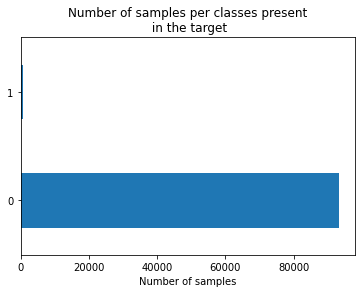

In [28]:
# OPTIONAL: Plot distribution of y
# y is etremely uneven distributed
# TBA: ?
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [29]:
# Set up our training and testing data. 
from sklearn.model_selection import train_test_split
# TBA: set sub parameters (testsize etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.5)

In [30]:
# create a first modeL: Logistic Regression Model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

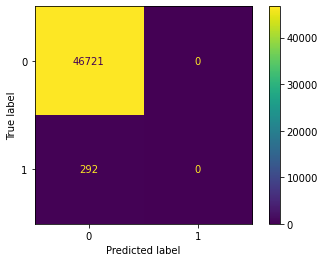

In [32]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)